<a href="https://colab.research.google.com/github/coolejungenhihi/volsurface_Sinkhorn/blob/main/quintic_OU_Fourier_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<header style="background-color: rgb(0, 62, 92); color: white; margin-top: 20px; padding:28px; ">

  <p style=" text-align: center; font-size: 32px;">   
   <strong> Fourier-Laplace transforms in polynomial Ornstein-Uhlenbeck volatility models:  </strong></p>
  <p style=" text-align: center; font-size: 25px;"><strong>The case of Quintic Ornstein-Uhlenbeck volatility model </strong></p>
  <p style=" text-align: center; font-size: 20px;">Eduardo Abi Jaber $\quad$  eduardo.abi-jaber@polytechnique.edu  </p>
  <p style=" text-align: center; font-size: 20px;">Shaun (Xiaoyuan) Li $\quad$  shaunlinz02@gmail.com  </p>  
  <p style=" text-align: center; font-size: 20px;">Xuyang Lin $\quad$  xuyang.lin@polytechnique.edu  </p>  
  
</header>

  <p style="background-color: rgb(0, 62, 92); color: white; text-align: center; font-size: 15px;"><strong>Based on the paper "Fourier-Laplace transforms in polynomial Ornstein-Uhlenbeck volatility models" </strong></p>

# Polynomial Ornstein-Uhlenbeck volatility models

The family of polynomial OU volatility models under the risk-neutral filtered probability space $(\Omega, \mathcal F,(\mathcal F_t)_{t\geq 0}, \mathbb Q )$  has the following dynamics:


\begin{equation}
  \begin{aligned}
    d S_t &= S_t \sigma_tdB_t, \quad  S_0 >0,\\
    \sigma_t &= g_0(t)  p(X_t), \quad p(x) = \sum_{k= 0}^{\infty} p_k x^k,\\
    dX_t &= (a+bX_t)dt + c dW_t, \quad X_0 \in \mathbb R,\\
\end{aligned}
  \end{equation}

with $a,b, p_k \in \mathbb R$, $c\neq 0$, $ B=\rho W + \sqrt{1-\rho^2} W^{\perp}$ and $\rho \in [-1,1]$. Here $(W,W^{\perp})$ is a two-dimensional Brownian motion on a risk-neutral filtered probability space $(\Omega, \mathcal F,(\mathcal F_t)_{t\geq 0}, \mathbb Q )$ satisfying the usual conditions.
 The deterministic bounded input curve   $g_0:[0,T] \to \mathbb R_{{+}}$ allows the model to match certain term structures of volatility, e.g. the forward variance curve since we have for $g_0(t) := \sqrt{\xi_0(t) / \mathbb E[p^2(X_t)]}$:

\begin{align}
\mathbb E \left[ \int_0^t \sigma^2_s ds \right] = \int_0^t \xi_0(s) ds, \quad t\geq 0.
\end{align}
Generally, this family of models is well-defined with $\int_0^T \mathbb E[p^2(X_s)ds] < \infty$ when
$$\sum_{k=0}^{\infty}(k-1)!! p_kx^k
$$
has infinite radius of convergence.

We will now present a particular case of the model: the Quintic Ornstein-Uhlenbeck volatility Model which has demonstrated remarkable capabilities in
fitting jointly the SPX-VIX volatility surface for short maturities between one week to three months supported by extensive empirical studies (Abi Jaber, Illand, and Li, 2022, 2023)

# Quintic Ornstein-Uhlenbeck volatility Model

The volatility process $\sigma_t$ under the Quintic OU Model takes the form of:

\begin{equation}
  \begin{aligned}
    \sigma_t &= \sqrt{\frac{\xi_0(t)}{\mathbb E \left[p(X_t)^2\right]}}p(X_t), \quad       p(x) =p_0 + p_1 x + p_3 x^3 + p_5 x^5,\\
      X_t &= \varepsilon^{\alpha} \int_0^t e^{\alpha\varepsilon^{-1}(t-s)} dW_s,
  \end{aligned}
  \end{equation}
  
with $\varepsilon>0$ and $\alpha\leq 0$. The non-negative coefficients $p_0,p_1,p_3,p_5\geq 0$ $(p_2=p_4 = 0)$ ensures {a negative leverage effect as well as the martingality of $S$ whenever $\rho\leq0$,} see \cite{jaber2022quintic} . The particular parametrization with $X$ means $a = 0, b = \alpha \varepsilon^{-1}$ and $c = \varepsilon^{\alpha}$.

## Fourier-Laplace transform

Under suitable conditions, the Fourier Laplace transform of the quintic (or polynomial) OU volatility model is affine in the powers of $X$ $(1,X, X^2, \cdots, X^n, \cdots)$, i.e.

\begin{align}
F(t,x):= \mathbb{E} \left[  \exp\left(\int_t^T g_1(T-s) d\log S_s + \int_t^T g_2(T-s) \sigma_s^2 ds\right) \vert X_t =x  \right]
\end{align}
can be represented by the following infinite power series

\begin{equation}
   F(t,x)
     = \exp\left(  \sum_{k\geq 0}\psi_k(T-t)x^k \right), \quad t \leq T,
\end{equation}

for some complex-valued functions $g_1,g_2: [0,T]\to \mathbb C$ such that $\Re(g_1)=0,\Re(g_2)\leq 0$, where $\psi_k$ solves a system of infinite-dimensional Riccati-type ODE:
\begin{align}
    \psi_k'(t) &= \Big(g_2(t) + \frac{g_1(t)}{2}(g_1(t)-1)\Big)g_0^2(T-t) (p*p)_k \\
    &+ bk\psi_k(t) + a(k+1)\psi_{k+1}(t) + \frac{c^2(k+2)(k+1)}{2}\psi_{k+2}(t)\\
    &+ \frac{c^2}{2}(\widetilde \psi (t)*\widetilde \psi (t))_k + \rho g_1(t) g_0(T-t) c (p*\widetilde \psi(t))_k ,\quad \widetilde \psi_k(t): = (k+1)\psi_{k+1}(t),
    \\ &\\
    \psi_k(0) &
    = 0.
\end{align}

## Numerical solution of the Riccati ODE

This infinite dimensional Riccati-type ODE can be solved numerically by truncating the system at some level $M$ and assume that $\psi_k = 0, k>M$. However, we still have a stiff M-dimensional ODE, for example, $c^2(k+1)(k+2)$ can be very large for large $k$, so classic ODE solver such as Runge-Kutta methods usually fails.

In the paper $\textbf{Fourier-Laplace transforms in polynomial Ornstein-Uhlenbeck volatility models}$, we developped a customized algorithm that combines variation of constants and an implicit Euler scheme to solve this M-dimensional Riccati equations.

Our numerical solver has shown to be stable enough to carry out calibration to market data. For most reasonable parameters our numerical solver appears to work. See our paper for detailed calibration results.

<div style="border:solid 1px; border-radius:8px; padding: 6px 8px 6px 8px; margin-top: 12px; border-color:rgb(0, 62, 92, 0.5); background-color:rgb(251, 251, 251);">
    <strong></strong><b style="color:red;">!!</b><b>  However</b>, in the extreme case where $c$ is very large and $p_k$ very large at higher orders of the polynomial, our solver still encounter numerical issues.  Please get in touch with the authors if you have any feedback and suggestions for improvements 😊
</div>

The main idea is to apply variation of constants and solves this $M$ system of Riccati ODE iteratively using an implicit scheme:

\begin{equation}
\begin{aligned}
    \psi(t_{i+1}) &= e^{A\Delta t} \psi(t_i) + \int_{t_i}^{t_{i+1}} e^{A (t_{i+1} -s )} P(s) ds + \int_{t_i}^{t_{i+1}} e^{A (t_{i+1} -s )} Q \psi(s) ds\\
    &+\frac{c^2}{2}\int_{t_i}^{t_{i+1}} e^{A (t_{i+1} -s )}(\widetilde \psi(s)* \widetilde \psi(s)) ds + \int_{t_i}^{t_{i+1}} e^{A (t_{i+1} -s )}l(s)N\psi(s) ds,
\end{aligned}
\end{equation}
and thus
\begin{align*}
   \psi(t_{i+1}) &\approx  J^{-1} \Big(e^{A\Delta t} \psi(t_i) + G_{\Delta} P(t_i)\Big),
\end{align*}
where $J = \bigg(I-G_{\Delta}\Big(\frac{c^2}{2}R^{(i)} + l(t_i)N + Q \Big) \bigg)$. For Detailed notation, please refer to to our paper.

To speed up the solver, we use an adaptive algorithm that controls the error coming from the second order term $\psi''(t)$ and JIT compilation. Here is the detailed implementation.

In [ ]:
#pip install py_vollib    #run this if you don't already have the py_vollib library installed#

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rcParams["figure.figsize"] = (4.8, 3.2)
import scipy
from scipy.optimize import minimize
from math import pi

import warnings
warnings.filterwarnings('ignore') #to suppress warning messages

In [ ]:
import numba as nb
from numba import njit
from numba import complex128, float64,int64

In [ ]:
from py_vollib.black_scholes.implied_volatility import implied_volatility
vec_find_vol_rat = np.vectorize(implied_volatility)

In [ ]:
import os
import multiprocessing
num_cores = os.cpu_count()
print(num_cores)
#The more core you have, the faster the code runs due to parallelization

8


# Riccati Solvers

In [ ]:
@njit(int64(int64),cache = True)
def doublefactorial(n):
    if n <= 0:
        return 1
    else:
        return n * doublefactorial(n-2)

In [ ]:
##### certain quantities can be pre-computed to save time
@njit(nb.types.Tuple((float64[:,::1], float64[::1],float64[:,::1],float64[:,::1],complex128[:,::1],float64[::1]))
      (float64,float64,float64[::1],int64,int64),cache = True)
def char_func_pre_calc_adaptive(b,c,p_k,M,truc_k):

    convol_p_k_temp = np.convolve(p_k,p_k)
    convol_p_k = np.zeros((M+1))
    convol_p_k[:len(convol_p_k_temp)] = convol_p_k_temp
    n = len(p_k)

    A_mat = np.arange(M+1)*b
    Q_mat = np.zeros((M+1,M+1))
    np.fill_diagonal(Q_mat[:-2,2:],np.minimum(np.arange(1,M),truc_k)*np.minimum(np.arange(2,M+1),truc_k)*c**2/2)

    kk = np.minimum(np.arange(0,M+1),truc_k)
    N_mat = np.zeros((M+1,M+1))
    for i in range(len(p_k)):
        np.fill_diagonal(N_mat[i:M+i,1:M+2-i],p_k[i])
    N_mat[:,1:] = N_mat[:,1:]*kk[1:]

    k_net = np.zeros((M+1,M+1))*1j
    for j in range(M):
        if j == 0:
            k_net[j:M+j,j+1] = np.arange(1,M+1-j)*(j+1)
        else:
            k_net[j:M+j,j+1] = np.arange(1,M+2-j)*(j+1)

    db_fac_coeff = np.array([doublefactorial(z) for z in np.arange(0,2*n,2)-1])*convol_p_k[np.arange(0,2*n,2)]

    return convol_p_k.reshape(-1,1),A_mat,N_mat,Q_mat,k_net,db_fac_coeff

In [ ]:
@njit(complex128(complex128,complex128,float64,float64,float64,float64,float64,float64[::1],int64,float64[:,::1],float64[::1],
                 float64[:,::1],float64[:,::1],complex128[:,::1],float64[::1],int64,float64),cache = True)
def riccati_solver_adaptive(g_1,g_2,rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol):
    phi_kk = np.zeros((M+1))*1j

    steps_start = 400
    t_start = 0.0
    dt_max = T/10
    n = len(p_k)
    np_arange = np.arange(0,2*n,2)

    if T<=1.5/52:
        dt_min = 0.00005
    else:
        dt_min = np.sqrt(4e-7*T)

    dt = np.maximum(T/steps_start,dt_min)

    while (t_start<T) and (dt!=0):
        Ri = np.zeros((M+1,M+1))*1j
        for j in range(M):
            Ri[j:M+j,j+1] = phi_kk[1:M+2-j]
        Ri=Ri*k_net

        std_X_t = np.sqrt(c**2/(-2*b)*(1-np.exp(2*b*(T-t_start))))
        normal_var = np.sum(db_fac_coeff*std_X_t**(np_arange))
        g_0_T_t = (np.sqrt(xi_0)/np.sqrt(normal_var))
        mmts = std_X_t**(np_arange-2)
        if mmts[0]==np.inf:
            mmts[0] = 0.0
        P_vec = (((g_2+g_1/2*(g_1-1))*g_0_T_t**2)*convol_p_k)[:,0]

        ######################################################################################### compute second order
        g_0_T_t_derivative = np.sqrt(xi_0)/(2*(normal_var**1.5))*c**2/2*np.exp(2*b*(T-t_start))*\
            np.sum((db_fac_coeff*np_arange)*mmts)
        g_0_T_t_derivative = np.maximum(g_0_T_t_derivative,0.0)
        P_vec_derivative = ((g_2+g_1/2*(g_1-1))*2*g_0_T_t*g_0_T_t_derivative)*convol_p_k
        first_order = (np.diag(A_mat)+Q_mat+c**2/2*Ri+rho*g_1*c*g_0_T_t*N_mat)@phi_kk+P_vec
        quad_derivative = np.zeros((M+1,M+1))*1j
        for j in range(M):
            quad_derivative[j:M+j,j+1] = first_order[1:M+2-j]
        quad_derivative = (quad_derivative*k_net)*2
        second_order = (np.diag(A_mat)+Q_mat+rho*g_1*c*g_0_T_t*N_mat)@first_order+\
            (rho*g_1*c*g_0_T_t_derivative*N_mat)@phi_kk+c**2/2*quad_derivative@phi_kk+P_vec_derivative[:,0]
        sec_order_error = np.average(np.abs(second_order/2*dt**2))
        #########################################################################################

        dt_temp = np.sqrt(tol/np.average(np.abs(second_order/2)))
        dt = np.minimum(T-t_start,np.minimum(np.maximum(dt_temp,dt_min),dt_max))

        e_A_dt_mat = np.exp(A_mat*dt)
        G_mat = (e_A_dt_mat-1)/A_mat
        G_mat[0] = dt
        J_mat = np.eye(M+1, dtype=np.complex128)-\
                            np.diag(G_mat).astype(np.complex128)@(c**2/2*Ri+rho*g_1*c*g_0_T_t*N_mat+Q_mat)
        rhs = e_A_dt_mat*phi_kk+G_mat*P_vec
        phi_kk = np.linalg.solve(J_mat,rhs)
        t_start=t_start+dt

    return np.exp(phi_kk[0])

In [ ]:
#JIT compilation for parallel processing across multiple CPUs
@njit(complex128[::1](float64[::1],complex128,float64,float64,float64,float64,float64,float64[::1],int64,float64[:,::1],float64[::1],
                 float64[:,::1],float64[:,::1],complex128[:,::1],float64[::1],int64,float64),parallel=True,cache = True)
def riccati_solver_adaptive_parallel(u_i,g_2,rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol):
    char_func = np.empty(len(u_i), dtype=np.complex128)
    for i in nb.prange(len(u_i)):
        char_func[i]= riccati_solver_adaptive(1j*u_i[i]+0.5,g_2,rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol)
    return char_func

# Pricer

Our numerical scheme gives us direct access to the characteristic function of $\log S$ to price derivatives via Fourier inversion techniques. There are several Fourier inversion techniques available in the literature to price European-style Vanilla calls and puts. Here we adapt the pricing formula suggested in (L. Lewis, 2001) with control variates

To speed up the computation of vanilla option price $C_t(S_t, K, T)$ for maturities $T-t$ with strike $K$ under the quintic (polynomial) OU volatility model, we introduce a control variate to reduce the number of evaluation of $\varphi(u)$ for different $u$:
\begin{equation}
C_t(S_t, K, T) = \widehat C_t(S_t, K, T) - \frac{K}{\pi}\int_0^\infty \Re\left[e^{\left(iu+\frac{1}{2}\right)k_t} \left (\varphi \left(u-\frac{i}{2} \right) - \widehat \varphi \left(u-\frac{i}{2} \right) \right)
  \right]\frac{du}{u^2+\frac{1}{4}},
\end{equation}
where $\widehat C_t(S_t, K, T)$ is the appropriate call price of the control variate. We set $\varphi(u):=F(t,x)$ the Fourier-Laplace transform of $\log(\frac{S_T}{S_t})$ by fixing  $g_2(t)=0$ and $g_1(t) = iu$; and $\widehat \varphi \left(u\right)$ is the Fourier-Laplace transform of $\log(\frac{S_T}{S_t})$ of the control variate.

For this notebook, we choose the Heston stochastic volatility model (Heston, 1993) as the control variate. The Heston model has the following dynamics:

\begin{equation}
  \begin{aligned}
    d S_t &= S_t \sigma_tdB_t, \quad  S_0 >0,\\
    \sigma_t^2 &= \kappa(\theta-\sigma_t^2)dt + \eta \sigma_tdW_t,\\
\end{aligned}
\end{equation}

with $\kappa,\theta,\sigma_0, \eta > 0$, $ B=\rho W + \sqrt{1-\rho^2} W^{\perp}$ and $\rho \in [-1,1]$. The Heston model is also affine in its state variables $(St, \sigma_t^2)$ with explicit solution of the characteristic function $\widehat \varphi(u)$, which enables fast pricing via Fourier inversion (i.e. $\widehat C_t$ can be efficiently computed).

Given the explicit solution of $\widehat \varphi$, we can then search for the combination of Heston parameters $(\kappa,\theta,\sigma_0, \eta, \rho)$ that minimizes the distance between $\varphi$ and $\widehat \varphi$. The idea is that for a given maturity $T$, if the  $\varphi$ and $\widehat \varphi$ are sufficiently close to each other, then the integral becomes close to zero and thus require less evaluation of $\varphi(u-\frac{i}{2})$. Of course, other control variates with explicit characteristic function (e.g. Black \& Scholes) can also be used.

Finally the improper integral numerically via the Gauss-Laguerre quadrature, which has been demonstrated to be efficient, see (Abi Jaber and Gérard, 2024) and (Hurd and Zhou, 2010).

We now summarize the computation steps:
1. determine the number of quadrature points $(u, w)$ required under the Gauss-Laguerre quadrature using the cummulants of the quintic (polynomial) OU model, similar to that of (Fang, W. Oosterlee, 2009)
2. Search the parameter space of the control variate (Heston model in this case) via a standard optimization algorithm aiming at minimizing the error  between  $\varphi$ and $\widehat \varphi$ evaluated at $u-\frac{i}{2}$, with $u$ from step 1
3. Compute $\widehat C_t$ and $C_t$ using the weights $w$ from step 1

### Gauss laguerre quadrature

In [ ]:
uu_ul = np.zeros(40)
counter = 0
gl_low = 20
gl_upp = 60
for i in range(gl_low,gl_upp,1):
    u_i, _ = np.polynomial.laguerre.laggauss(i)
    uu_ul[counter] = u_i[-1]
    counter+=1
def gauss_laguerre_lvl(rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol,gl_low):
    du = complex(0.001)
    g_2=0.0
    #c1 and c2 are cummulants of the quintic OU model used to decide the number of points evaluated under the gauss laguerre quadrature
    c1 = (np.log(riccati_solver_adaptive(0.5*du,g_2,rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol))-\
    np.log(riccati_solver_adaptive(-0.5*du,g_2,rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol)))/(du)
    c2 = (np.log(riccati_solver_adaptive(du,g_2,rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol))+\
    np.log(riccati_solver_adaptive(-du,g_2,rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol)))/(du**2)
    L=60
    aa,bb = c1-L*np.sqrt(np.abs(c2)),c1+L*np.sqrt(np.abs(c2))
    N = 2**8
    ul = N*pi/(bb-aa).real

    return np.argmin(np.abs(uu_ul-ul))+gl_low+1

### Control variate

In [ ]:
#Control variate
def laplace_Heston(kappa,eta,rho,V_0,theta, T,u):
    xi = kappa - eta*rho*u*1j
    d = np.sqrt( (eta*rho*u*1j-kappa)*(eta*rho*u*1j-kappa) + (eta*eta) * (u*u + 1j*u) )
    g2 = (xi-d)/(xi+d)
    cf = np.exp((kappa*theta)/(eta*eta) * ( (xi-d)*T - 2*np.log( (1-g2*np.exp(-d*T))/(1-g2) ))\
              + (V_0/(eta*eta))*(xi-d) * (1-np.exp(-d*T))/(1-g2*np.exp(-d*T)) )
    return cf
def find_heston_cv(model_param,u,T,laplace_trans):
    kappa,eta,rho,V_0,theta = model_param
    hest_cf = laplace_Heston(kappa,eta,rho,V_0,theta,T,u)

    return np.average(np.array(hest_cf-laplace_trans).real**2+np.array(hest_cf-laplace_trans).imag**2)

In [ ]:
u_hest, w_hest = np.polynomial.laguerre.laggauss(185)

### Fourier Pricer

In [ ]:
@njit(float64[::1](float64,float64[::1],float64,float64,float64,float64,float64,float64[::1],int64,float64[:,::1],float64[::1],
                 float64[:,::1],float64[:,::1],complex128[:,::1],float64[::1],int64,float64),parallel=True,cache = True)
def pricing_function(S0,strike_array,rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol):
    g_2=0.0j
    with nb.objmode(u_i="float64[::1]",w_i="float64[::1]"):  #everything inside the with is run with pure python, so scipy can be used
        lvl = gauss_laguerre_lvl(rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol,gl_low)
        u_i, w_i = np.polynomial.laguerre.laggauss(lvl)
    cf_quintic = riccati_solver_adaptive_parallel(u_i,g_2,rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol)

    with nb.objmode(hes_laplace="complex128[::1]",heston_price="float64[::1]"):  #everything inside the with is run with pure python, so scipy can be used
        param_init = np.array([-b,c,rho,np.sqrt(xi_0),np.sqrt(xi_0)])
        l_bnd = np.array([0.5,0.5,-0.99,0.001,0.005]).reshape(-1,1)
        r_bnd = np.array([100,50,-0.2,1,0.5]).reshape(-1,1)
        bounds_x = np.concatenate((l_bnd,r_bnd),axis=1)
        hest_cv_opt_algo = minimize(find_heston_cv, param_init, args=(u_i-0.5j,T,cf_quintic),method='SLSQP',
                       bounds=bounds_x, tol=1e-20)
        hest_cv_opt = hest_cv_opt_algo.x
        kappa_h,eta_h,rho_h,V_0_h,theta_h = hest_cv_opt
        hes_laplace = laplace_Heston(kappa_h,eta_h,rho_h,V_0_h,theta_h, T,u_i-0.5j)

        #computing heston control variate option price
        char_func_hest = laplace_Heston(kappa_h,eta_h,rho_h,V_0_h,theta_h, T,u_hest-0.5j)
        integrand_heston = np.real(np.exp((1j*u_hest+0.5)*np.log(S0/strike_array).reshape(-1,1))*(char_func_hest))/(u_hest**2+0.25)
        heston_price = S0-np.sum(integrand_heston*np.exp(u_hest)*w_hest,axis=1)*strike_array/pi

    integrand_hest = np.real(np.exp((1j*u_i+0.5)*np.log(S0/strike_array).reshape(-1,1))*(cf_quintic-hes_laplace))/(u_i**2+0.25)
    opt_price_quintic = heston_price-np.sum(integrand_hest*np.exp(u_i)*w_i,axis=1)*strike_array/pi

    return opt_price_quintic

### Monte Carlo Pricer

For completeness, we also include a Monte Carlo Pricer for the Quintic OU volatility model with antithetic and control variates as per (Bergomi, 2016). We can then compare the two pricers together in terms of computation time and accuracy.

In [ ]:
#algorithm for computing polynomial expressions
def horner_vector(poly, n, x):
    #Initialize result
    result = poly[0].reshape(-1,1)
    for i in range(1,n):
        result = result*x + poly[i].reshape(-1,1)
    return result

In [ ]:
def bs_price_call(s,sigma,T,K):
    #x is defined as St/K
    d1 = (np.log(s/K)+0.5*np.power(sigma,2.0)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    price = s*scipy.special.ndtr(d1)-K*scipy.special.ndtr(d2)
    return price

In [ ]:
def gen_bm_path(n_steps,N_sims):
    w1 = np.random.normal(0, 1, (n_steps, N_sims))
    #Antithetic variates
    w1 = np.concatenate((w1, -w1), axis = 1)
    return w1

In [ ]:
def mc_quintic_fwd_var(rho,b,c,T,p_k,xi_0,S0,strike_array,n_steps,N_sims,w1,compute_iv = True):

    dt = T/n_steps
    tt = np.linspace(0., T, n_steps + 1)

    exp1 = np.exp(-b*tt)
    exp2 = np.exp(-2*b*tt)

    diff_exp2 = np.concatenate((np.array([0.]),np.diff(exp2)))
    std_vec = np.sqrt(diff_exp2/(-2*b))[:,np.newaxis] #to be broadcasted columnwise
    exp1 = exp1[:,np.newaxis]
    Xt = (1/exp1[1:])*(c*np.cumsum(std_vec[1:]*w1, axis = 0))
    Xt= np.concatenate((np.zeros(w1.shape[1])[np.newaxis, :],Xt))
    std_X_t = np.sqrt(c**2/(-2*b)*(1-np.exp(2*b*tt)))
    n = len(p_k)

    cauchy_product = np.convolve(p_k,p_k)
    normal_var = np.sum(cauchy_product[np.arange(0,2*n,2)].reshape(-1,1)*std_X_t**(np.arange(0,2*n,2).reshape(-1,1))*\
        np.maximum(scipy.special.factorial2(np.arange(0,2*n,2).reshape(-1,1)-1),1),axis=0)

    f_func = horner_vector(p_k[::-1], len(p_k), Xt)

    del Xt

    volatility = f_func/np.sqrt(normal_var.reshape(-1,1))
    del f_func
    volatility = np.sqrt(xi_0)*volatility

    logS1 = np.log(S0)
    for i in range(w1.shape[0]):
        logS1 = logS1-0.5*dt*(volatility[i]*rho)**2+np.sqrt(dt)*rho*volatility[i]*w1[i]
    del w1
    ST1 = np.exp(logS1)
    del logS1

    int_var = np.sum(volatility[:-1,]**2*dt,axis=0)
    Q = np.max(int_var)+1e-9
    del volatility
    X = (bs_price_call(ST1,np.sqrt((1-rho**2)*int_var/T),T,strike_array.reshape(-1,1))).T
    Y = (bs_price_call(ST1,np.sqrt(rho**2*(Q-int_var)/T),T,strike_array.reshape(-1,1))).T
    del int_var
    eY = (bs_price_call(S0,np.sqrt(rho**2*(Q)/T),T,strike_array.reshape(-1,1))).T

    c = []
    for i in range(strike_array.shape[0]):
        cova = np.cov(X[:,i]+10,Y[:,i]+10)[0,1]
        varg = np.cov(X[:,i]+10,Y[:,i]+10)[1,1]
        if (cova or varg)<1e-8:
            temp = 1e-40
        else:
            temp = np.nan_to_num(cova/varg,1e-40)
        temp = np.minimum(temp,2)
        c.append(temp)
    c = np.array(c)

    call_mc_cv1 = X-c*(Y-eY)
    del X
    del Y
    del eY
    p_mc_cv1 = np.average(call_mc_cv1,axis=0)
    std_mc_cv1 = np.std(call_mc_cv1,axis=0)

    if compute_iv:
        flag = 'c'
        imp_mc = vec_find_vol_rat(p_mc_cv1, S0, strike_array, T, 0.0, flag)
        imp_mc_upper = vec_find_vol_rat(p_mc_cv1 + 1.96*std_mc_cv1/(np.sqrt(2*N_sims)), S0, strike_array, T, 0.0, flag)
        imp_mc_lower = vec_find_vol_rat(p_mc_cv1 - 1.96*std_mc_cv1/(np.sqrt(2*N_sims)), S0, strike_array, T, 0.0, flag)

        return p_mc_cv1, std_mc_cv1, imp_mc, imp_mc_upper, imp_mc_lower

    else:
        return p_mc_cv1,std_mc_cv1

# Example

In [ ]:
S0 = 100.0
tol = 1e-9
M = 32
truc_k=15
eps=1/52

In [ ]:
rho=-0.6
alpha=-0.6
eps = 1/52
xi_0=0.025
b = alpha/eps
c = eps**alpha
p_k = np.array([0.01,1,0,0.214,0,0.227])
convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff = char_func_pre_calc_adaptive(b,c,p_k,M,truc_k)

In [ ]:
T=1/52
lm = np.linspace(-0.2,0.03,100)
strike_array = np.exp(lm)*S0

In [ ]:
#### The first time running the following cell can take twice or three times as long due to jit compilation

In [ ]:
%%time
opt_price = pricing_function(S0,strike_array,rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol)
iv_hc = vec_find_vol_rat(opt_price, S0, strike_array, T, 0.0, 'c')

CPU times: total: 3.94 s
Wall time: 593 ms


In [ ]:
n_steps = 800
N_sims = 40000
np.random.seed(42)
w1=gen_bm_path(n_steps,N_sims)

In [ ]:
%%time
p_mc, std_mc, imp_mc, imp_mc_upper, imp_mc_lower = mc_quintic_fwd_var(rho,b,c,T,p_k,xi_0,S0,strike_array,n_steps,N_sims,w1,compute_iv = True)

CPU times: total: 5.12 s
Wall time: 4.31 s


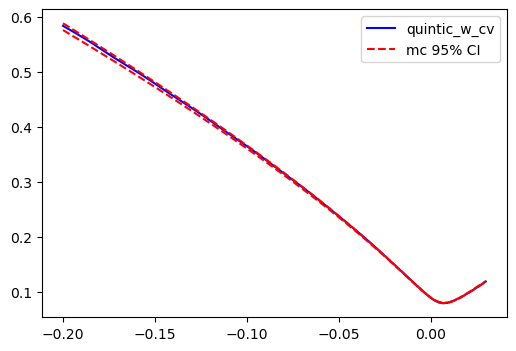

In [ ]:
plt.figure(1,figsize=(6,4))
plt.plot(lm,iv_hc,c='blue',label='quintic_w_cv')
plt.plot(lm,imp_mc_upper,c='red',ls='--',label='mc 95% CI')
plt.plot(lm,imp_mc_lower,c='red',ls='--')
plt.legend()
plt.show()

In [ ]:
T=2
lm = np.linspace(-1.5,0.35,100)
strike_array = np.exp(lm)*S0

In [ ]:
%%time
opt_price = pricing_function(S0,strike_array,rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol)
iv_hc = vec_find_vol_rat(opt_price, S0, strike_array, T, 0.0, 'c')

CPU times: total: 1.22 s
Wall time: 199 ms


In [ ]:
n_steps = 4000
N_sims = 40000
np.random.seed(42)
w1=gen_bm_path(n_steps,N_sims)

In [ ]:
%%time
p_mc, std_mc, imp_mc, imp_mc_upper, imp_mc_lower = mc_quintic_fwd_var(rho,b,c,T,p_k,xi_0,S0,strike_array,n_steps,N_sims,w1,compute_iv = True)

CPU times: total: 23.2 s
Wall time: 22.4 s


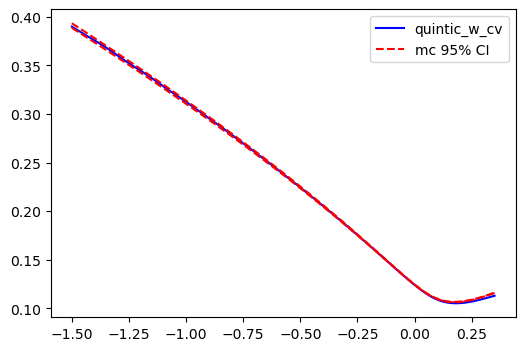

In [ ]:
plt.figure(1,figsize=(6,4))
plt.plot(lm,iv_hc,c='blue',label='quintic_w_cv')
plt.plot(lm,imp_mc_upper,c='red',ls='--',label='mc 95% CI')
plt.plot(lm,imp_mc_lower,c='red',ls='--')
plt.legend()
plt.show()

## Bias in MC estimator for large maturities

For small maturity (e.g.  $\leq $ 3 months), the Monte Carlo bias is usually not very noticeable with respect to different step sizes.

However, for large maturities e.g. $T=2$, one needs a lot of time steps in order to remove any significant bias in the Monte Carlo estimator for models of fast regime (fast mean reverion). The following examples demonstrate the potential bias in the MC estimator with coarser step size for large maturity $T=2$ years:

### Case 1: small maturities

In [ ]:
T=1/52
lm = np.linspace(-0.2,0.03,100)
strike_array = np.exp(lm)*S0

In [ ]:
n_steps = 50
N_sims = 40000
np.random.seed(42)
w1=gen_bm_path(n_steps,N_sims)
_, _, imp_mc_50, imp_mc_upper_50, imp_mc_lower_50 = mc_quintic_fwd_var(rho,b,c,T,p_k,xi_0,S0,strike_array,n_steps,N_sims,w1,compute_iv = True)
n_steps = 400
N_sims = 40000
np.random.seed(42)
w1=gen_bm_path(n_steps,N_sims)
_, _, imp_mc_400, imp_mc_upper_400, imp_mc_lower_400 = mc_quintic_fwd_var(rho,b,c,T,p_k,xi_0,S0,strike_array,n_steps,N_sims,w1,compute_iv = True)
n_steps = 2000
N_sims = 40000
np.random.seed(42)
w1=gen_bm_path(n_steps,N_sims)
_, _, imp_mc_4000, imp_mc_upper_4000, imp_mc_lower_4000 = mc_quintic_fwd_var(rho,b,c,T,p_k,xi_0,S0,strike_array,n_steps,N_sims,w1,compute_iv = True)

In [ ]:
opt_price = pricing_function(S0,strike_array,rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol)
iv_hc = vec_find_vol_rat(opt_price, S0, strike_array, T, 0.0, 'c')

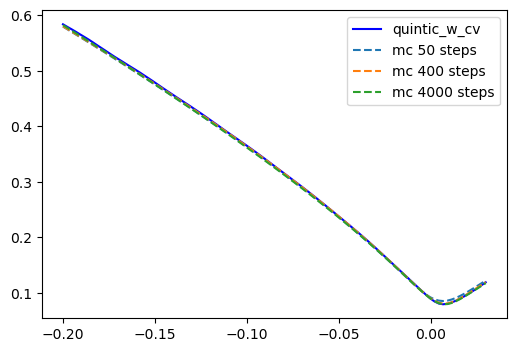

In [ ]:
plt.figure(1,figsize=(6,4))
plt.plot(lm,iv_hc,c='blue',label='quintic_w_cv')
plt.plot(lm,imp_mc_50,ls='--',label='mc 50 steps')
plt.plot(lm,imp_mc_400,ls='--',label='mc 400 steps')
plt.plot(lm,imp_mc_4000,ls='--',label='mc 4000 steps')
plt.legend()
plt.show()

### Case 2: large maturities

In [ ]:
T=2
lm = np.linspace(-1.5,0.35,100)
strike_array = np.exp(lm)*S0

In [ ]:
n_steps = 50
N_sims = 40000
np.random.seed(42)
w1=gen_bm_path(n_steps,N_sims)
_, _, imp_mc_50, imp_mc_upper_50, imp_mc_lower_50 = mc_quintic_fwd_var(rho,b,c,T,p_k,xi_0,S0,strike_array,n_steps,N_sims,w1,compute_iv = True)
n_steps = 400
N_sims = 40000
np.random.seed(42)
w1=gen_bm_path(n_steps,N_sims)
_, _, imp_mc_400, imp_mc_upper_400, imp_mc_lower_400 = mc_quintic_fwd_var(rho,b,c,T,p_k,xi_0,S0,strike_array,n_steps,N_sims,w1,compute_iv = True)
n_steps = 4000
N_sims = 40000
np.random.seed(42)
w1=gen_bm_path(n_steps,N_sims)
_, _, imp_mc_4000, imp_mc_upper_4000, imp_mc_lower_4000 = mc_quintic_fwd_var(rho,b,c,T,p_k,xi_0,S0,strike_array,n_steps,N_sims,w1,compute_iv = True)

In [ ]:
opt_price = pricing_function(S0,strike_array,rho,b,c,xi_0,T,p_k,truc_k,convol_p_k,A_mat,N_mat,Q_mat,k_net,db_fac_coeff,M,tol)
iv_hc = vec_find_vol_rat(opt_price, S0, strike_array, T, 0.0, 'c')

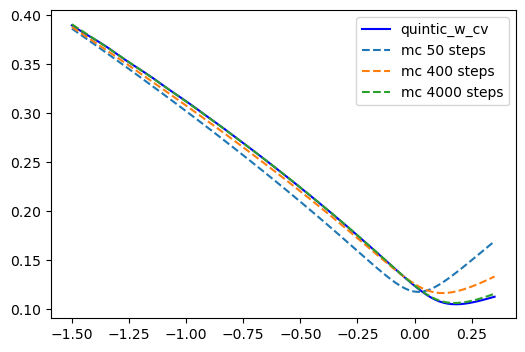

In [ ]:
plt.figure(1,figsize=(6,4))
plt.plot(lm,iv_hc,c='blue',label='quintic_w_cv')
plt.plot(lm,imp_mc_50,ls='--',label='mc 50 steps')
plt.plot(lm,imp_mc_400,ls='--',label='mc 400 steps')
plt.plot(lm,imp_mc_4000,ls='--',label='mc 4000 steps')
plt.legend()
plt.show()

# References

1. Eduardo Abi Jaber,  Shaun (Xiaoyuan) Li and Xuyang Lin. Fourier-Laplace transforms in polynomial Ornstein-Uhlenbeck volatility models
   
3. Eduardo Abi Jaber, Camille Illand, and Shaun (Xiaoyuan) Li. Joint SPX–VIX calibration with gaussian polynomial volatility models: deep pricing with quantization hints. Available at SSRN 4292544, 2022

4. Eduardo Abi Jaber, Camille Illand, and Shaun (Xiaoyuan) Li. The quintic ornstein-uhlenbeck volatility model that jointly calibrates SPX & VIX smiles. Risk Magazine, Cutting Edge Section, 2023

5. Alan L Lewis. A simple option formula for general jump-diffusion and other exponential lévy processes. Available at SSRN 282110, 2001

6. Steven L Heston. A closed-form solution for options with stochastic volatility with applications to bond and currency options. The review of financial studies, 6(2):327–343, 1993

7. Eduardo Abi Jaber and Louis-Amand Gérard. Signature volatility models: pricing and hedging with fourier. Available at SSRN 4714535, 2024

8. Thomas R Hurd and Zhuowei Zhou. A fourier transform method for spread option pricing. SIAM Journal on Financial Mathematics, 1(1):142–157, 2010

9. Fang Fang and Cornelis W Oosterlee. A novel pricing method for european options based on fourier-cosine series expansions. SIAM Journal on Scientific Computing, 31(2):826–848, 2009

10. Lorenzo Bergomi. Stochastic volatility modeling. CRC press, 2015.